# Chapter 5: Continuous Random Variables
 
This Jupyter notebook is the Python equivalent of the R code in section 5.9 R, pp. 228 - 231, [Introduction to Probability, 1st Edition](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578), Blitzstein & Hwang.

----

In [1]:
import numpy as np

## Python, SciPy and Matplotlib

In this section we will introduce continuous distributions in Python and SciPy, learn how to make basic plots, demonstrate the universality of the Uniform by simulation, and simulate arrival times in a Poisson process.

## Uniform, Normal, and Exponential distributions 

For [continuous distributions in `scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html), the `pdf` function gives the PDF, the `cdf` function gives the CDF, and the `rvs` function generates random numbers from the continuous distribution. This is in keeping with the application programming interface of the [discrete statistical distributions in `scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html). Thus, we have the following functions: 

### Uniform
[`scipy.stats.uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) provides functions for Uniform continuous random variables. 
* To evaluate the $Unif(a, b)$ PDF at $x$, we use `uniform.pdf(x, a, b)`. 
* For the CDF, we use `uniform.cdf(x, a, b)`. 
* To generate $n$ realizations from the $Unif(a, b)$ distribution, we use `uniform.rvs(a, b, size=n)`. 

In [2]:
# seed the random number generator
np.random.seed(1597)

from scipy.stats import uniform

# to learn more about scipy.stats,uniform un-comment ouf the following line
#print(uniform.__doc__)

a = 0
b = 4
x = 3
n = 10

print('PDF of Unif({}, {}) evaluated at {} is {}\n'.format(a, b, x, uniform.pdf(x, a, b)))

print('CDF of Unif({}, {}) evaluated at {} is {}\n'.format(a, b, x, uniform.cdf(x, a, b)))

print('Generating {} realizations from Unif({}, {}):\n{}'.format(n, a, b, uniform.rvs(a, b, size=n)))

PDF of Unif(0, 4) evaluated at 3 is 0.25

CDF of Unif(0, 4) evaluated at 3 is 0.75

Generating 10 realizations from Unif(0, 4):
[3.24085002 2.48793265 0.69337744 3.98212677 3.53906749 0.19890551
 3.30252222 2.37991343 1.42342695 1.92222338]


### Normal
[`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) provides functions for normal continuous random variables. 

* To evaluate the $N(\mu, \sigma^2)$ PDF at $x$, we use `norm.pdf(x, loc, scale)`, where the parameter `loc` corresponds to $\mu$ and `scale` corresponds to standard deviation $\sigma$ (and **not** variance $\sigma^2$).
* For the CDF, we use `norm.cdf(x, loc, scale)`. 
* To generate $n$ realizations from the $N(\mu, \sigma^2)$ distribution, we use `norm.rvs(loc, scale, size=n)`. 

In [3]:
np.random.seed(2584)

from scipy.stats import norm

# to learn more about scipy.stats,norm un-comment ouf the following line
#print(norm.__doc__)

mu = 0.0
sigma = 2.0
x = 1.5

print('PDF of N({}, {}) evaluated at {} is {}\n'.format(mu, sigma, x, norm.pdf(x, mu, sigma)))

print('CDF of N({}, {}) evaluated at {} is {}\n'.format(mu, sigma, x, norm.cdf(x, mu, sigma)))

print('Generating {} realizations from N({}, {}):\n{}'.format(n, mu, sigma, norm.rvs(mu, sigma, size=n)))

PDF of N(0.0, 2.0) evaluated at 1.5 is 0.15056871607740221

CDF of N(0.0, 2.0) evaluated at 1.5 is 0.7733726476231317

Generating 10 realizations from N(0.0, 2.0):
[-4.56890553  1.4163793  -0.72812069  1.80610792 -1.5542524   0.4551897
 -1.82794816  1.58959742 -3.26902153 -2.71002864]


&#x2623; 5.9.1 (Normal parameters in `scipy.stats.norm`). Note that we have to input the standard deviation for the `scale` parameter value, not the variance! For example, to get the $N(10, 3)$ CDF at 12, we use`norm.cdf(12, 10, np.sqrt(3))`. Ignoring this is a common, disastrous coding error.

In [4]:
loc = 10
var = 3
scale = np.sqrt(var)
x = 12

ans = norm.cdf(x, loc, scale)

print('N({}, {}) CDF at {} is {}'.format(loc, scale, x, ans))

N(10, 1.7320508075688772) CDF at 12 is 0.8758934605050381


### Exponential
[`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) provides functions for exponential continuous random variables. The probability density function for $Expo(\lambda)$ is:

\begin{align}
  f(x) &= e^{-x}
\end{align}


The probability density is defined in the “standardized” form. To shift and/or scale the distribution use the `loc` and `scale` parameters. Specifically, `expon.pdf(x, loc, scale)` is identically equivalent to `expon.pdf(y) / scale` with `y = (x - loc) / scale`.

* To evaluate the $Expo(\lambda)$ PDF at $x$, we use `expon.pdf(x, scale=1/lambda)`, where the $\lambda$ corresponds to `scale=1/lambd`.
* For the CDF, we use `expon.cdf(x, scale=1/lambd)`. 
* To generate $n$ realizations from the $Expo(\lambda)$ distribution, we use `expon.rvs(scale=1/lambd, size=n)`.

In [5]:
np.random.seed(4181)

from scipy.stats import expon

# to learn more about scipy.stats,expon un-comment ouf the following line
#print(expon.__doc__)

lambd = 2.1
x = 5

expon.pdf(x, scale=1/lambd)

print('PDF of Expo({}) evaluated at {} is {}\n'.format(lambd, x, expon.pdf(x, scale=1/lambd)))

print('CDF of Expo({}) evaluated at {} is {}\n'.format(lambd, x, expon.cdf(x, scale=1/lambd)))

print('Generating {} realizations from Expo({}):\n{}\n'.format(n, lambd, expon.rvs(scale=1/lambd, size=n)))

PDF of Expo(2.1) evaluated at 5 is 5.782654363446904e-05

CDF of Expo(2.1) evaluated at 5 is 0.9999724635506503

Generating 10 realizations from Expo(2.1):
[0.44907946 0.77554149 1.469014   0.15728342 0.92258566 0.54294386
 0.80347768 0.23157762 0.34759354 1.03891708]



Due to the importance of location-scale transformations for continuous distributions, SciPy has default parameter settings for each of these three families. The default for the Uniform [`scipy.stats.uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) is `loc=0, scale=1`, the default for the Normal [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm) is `loc=0, scale=1`, and the default for the Exponential [`scipy.stats.expon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) is `loc=0, scale=1`.

For example, `uniform.pdf(0.5)`, with no additional inputs, evaluates the $Unif(0, 1)$ PDF at 0.5.

In [6]:
uniform.pdf(0.5)

1.0

`norm.rvs(size=10)`, with no additional inputs, generates 10 realizations from the $N (0, 1)$ distribution.

In [7]:
norm.rvs(size=10)

array([ 0.79839927, -0.69769073,  0.34055804, -0.22043838,  0.79782274,
       -2.60292799, -1.53866926,  0.93084378,  0.81590117, -0.42043989])

This means there are two ways to generate a $N(\mu, \sigma^2)$ random variable in SciPy. After choosing our values of $\mu$ and $\sigma$,

In [8]:
mu = 1
sigma = 2

we can do either of the following:

In [9]:
ans1 = norm.rvs(mu, sigma, size=1, random_state=42)
ans2 = mu + sigma * norm.rvs(size=1, random_state=42)

print('norm.rvs(mu, sigma, size=1) = {}'.format(ans1))
print('mu + sigma * norm.rvs(size=1) = {}'.format(ans2))

norm.rvs(mu, sigma, size=1) = [1.99342831]
mu + sigma * norm.rvs(size=1) = [1.99342831]


Either way, we end up generating a draw from the N (µ, σ2) distribution.

## Plots in Matplotlib

Plotting in Python within a Jupyter notebook is done in [Matplotlib](https://matplotlib.org/). 

First, we import `matplotlib.pyplot` module. To cut down on typing, we can alias that imported `matplotlib.pyplot` module reference as `plt` for short. We then invoke the `%matplotlib inline%` Jupyter notebook magic command in order to create Matplotlib graphs right in your notebook.

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

Here is how we can create a plot of the standard Normal PDF from −3 to 3 using Matplotlib in Jupyter notebook.

[`numpy.linspace`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linspace.html) creates an evenly-spaced numerical sequence, ranging from `start` to `stop`. The third function parameter `num` lets you specify how many numbers in the sequence to generate. 

We use `numpy.linspace(-3, 3, 1000)` to generate 1000 numbers ranging from -3 to 3 as our `x` values in the graph; with 1000 values in the sequence, the curve looks very smooth. If we were to choose `num=20`, the piecewise linearity would become very apparent.

In [11]:
x = np.linspace(-3, 3, 1000)

We can then call `norm.pdf(x)` to generate the `y` values in the graph, and pass both the `x` and `y` values to [`matplotlib.pyplot.plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html). This will render a graph of $N(0,1)$ from -3 to 3. `pyplot.show` will display the graph.

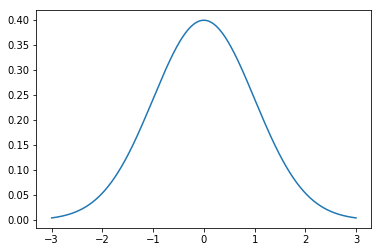

In [12]:
plt.plot(x, norm.pdf(x))
plt.show()

Alternately, we could "freeze" an instance of the `scipy.stats.norm` distribution object to fix the shape, location and scale parameters. This might be useful if you are working with multiple distributions with differing shape, location and scale, and wanted to use these distributions throughout your notebook.

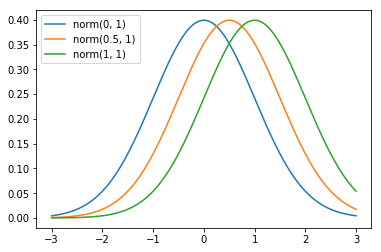

In [13]:
rv1 = norm(0, 1)
rv2 = norm(0.5, 1)
rv3 = norm(1, 1)

plt.plot(x, rv1.pdf(x), label='norm(0, 1)')
plt.plot(x, rv2.pdf(x), label='norm(0.5, 1)')
plt.plot(x, rv3.pdf(x), label='norm(1, 1)')

plt.legend()

plt.show()

We can also set the axis labels and plot title with [`pyplot.xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html), [`pyplot.ylabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html), and [`pyplot.title`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html) functions.

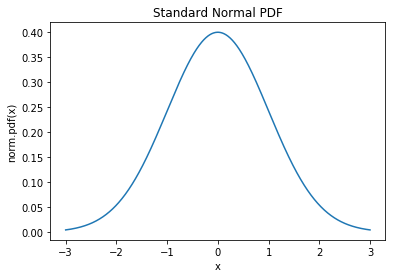

In [14]:
rv = norm()
plt.plot(x, rv.pdf(x))

plt.xlabel('x')
plt.ylabel('norm.pdf(x)')
plt.title('Standard Normal PDF')

plt.show()

The axis limits can be set manually with [`pyplot.xlim`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlim.html) and [`pyplot.ylim`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html) If, for example, you wanted the vertical axis to range from 0 to 1, you would follow the call to `pyplot.plot` with `pyplot.ylim([0, 1])`.

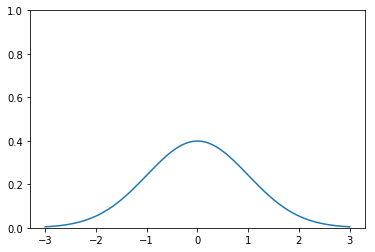

In [15]:
plt.plot(x, rv.pdf(x))
plt.ylim([0, 1])
plt.show()

Finally, to change the color of the plot, add `color="orange"` or `color="green"`, or whatever your favorite color is! (see [Specifying Colors](https://matplotlib.org/users/colors.html) in the Matplotlib documentation)

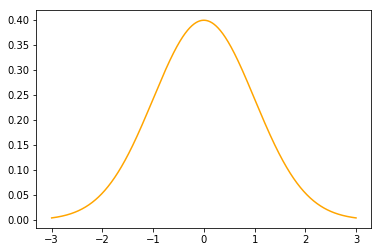

In [16]:
plt.plot(x, rv.pdf(x), color='orange')
plt.show()

## Universality with Logistic

We proved in Example 5.3.4 that for $U \sim Unif(0, 1)$, the r.v.  $log\left(\frac{U}{1−U}\right)$ follows a Logistic distribution. In SciPy and `uniform.rvs`, we can simply generate a large number of $Unif(0, 1)$ realizations and transform them.

In [17]:
u = uniform.rvs(size=10**4)
x = np.log(u/(1-u))
x

array([ 2.0197625 , -0.72108035, -1.86938026, ..., -1.2638552 ,
        1.8532956 ,  1.46624836])

Now `x` contains 10<sup>4</sup> realizations from the distribution of $log\left(\frac{U}{1−U}\right)$. We can visualize them with a histogram, using [`matplotlib.hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). The histogram resembles a Logistic PDF, which is reassuring. To control how fine-grained the histogram is, we can set the number of bins in the histogram via the `bins` parameter (the 2nd parameter passed into `pyplot.hist`: `hist(x, 100)` produces a finer histogram, while `hist(x, 10)` produces a coarser histogram.

To illustrate, we will generate two graphs side-by-side with [`pyplot.figure`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html), and use a [`pyplot.subplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) for each graph.

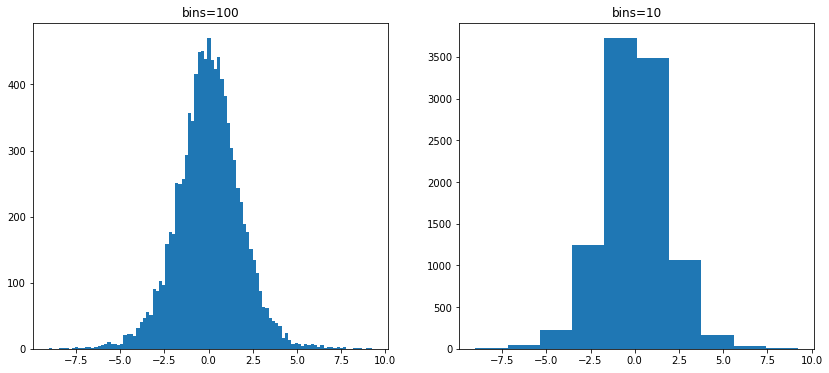

In [18]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121)
ax1.hist(x, 100)
ax1.set_title('bins=100')

ax2 = fig.add_subplot(122)
ax2.hist(x, 10)
ax2.set_title('bins=10')

plt.show()

## Poisson process simulation

To simulate $n$ arrivals in a Poisson process with rate $\lambda$, we first generate the interarrival times as i.i.d. Exponentials and store them in variable `x`:

In [19]:
n = 50
lambd = 10
x = expon.rvs(scale=1/lambd, size=n)
print(x)

[0.17627964 0.01902565 0.02146015 0.19802154 0.16173354 0.02476036
 0.02394206 0.11207592 0.00051518 0.09787187 0.06122226 0.07313865
 0.07720919 0.15936267 0.00195037 0.01965782 0.00122744 0.03186262
 0.13671518 0.29913587 0.05325137 0.1329256  0.18825129 0.31339715
 0.07390052 0.2792474  0.19905106 0.1237123  0.12739159 0.05063309
 0.00787248 0.20327465 0.28319828 0.0039541  0.0084741  0.01842843
 0.00354277 0.08189181 0.07338873 0.03824727 0.02011739 0.0211869
 0.02824106 0.07150573 0.24463567 0.35755971 0.01220348 0.00555063
 0.05732313 0.20553653]


Then we convert the interarrival times into arrival times using the [`numpy.cumsum`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cumsum.html) function, which stands for "cumulative sum".

In [20]:
t = np.cumsum(x)
print(t)

[0.17627964 0.19530529 0.21676545 0.41478698 0.57652053 0.60128088
 0.62522295 0.73729887 0.73781405 0.83568592 0.89690818 0.97004683
 1.04725602 1.20661869 1.20856907 1.22822689 1.22945433 1.26131695
 1.39803213 1.697168   1.75041936 1.88334496 2.07159625 2.38499339
 2.45889391 2.73814132 2.93719238 3.06090468 3.18829627 3.23892936
 3.24680184 3.4500765  3.73327478 3.73722888 3.74570298 3.76413141
 3.76767418 3.849566   3.92295473 3.961202   3.98131938 4.00250628
 4.03074735 4.10225307 4.34688874 4.70444845 4.71665193 4.72220256
 4.77952569 4.98506222]


The array `t` now contains all the simulated arrival times.

----

&copy; Blitzstein, Joseph K.; Hwang, Jessica. Introduction to Probability (Chapman & Hall/CRC Texts in Statistical Science).